# Introduction
The goal of this kernel is to practice and create a clear guide of how to use the logistic regression estimator. 

1. [Import data and python packages](#t1.)
2. [Assess Data Quality & Missing Values](#t2.)
3. [Exploratory Data Analysis](#t3.)
4. [Logistic Regression and Results](#t4.)

<a id="t1."></a>
# 1. Import data and python packages

In [137]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

# ML and Logic Regresion
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import auc
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Setup Complete")

Setup Complete


In [138]:
# Read CSV data file into DataFrame
hd_filepath = "heart.csv"
hd_df = pd.read_csv(hd_filepath)

# Preview the data
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [139]:
print('The number of samples in this data set is of {}.'.format(hd_df.shape[0]))

The number of samples in this data set is of 303.


<a id="t2."></a>
# 2. Assess the Data

### Step 1. Data Description

Heart diseases are responsible for millions of deaths each year in the world. In fact, health problems associated with the heart have become the leading cause of death in recent years. Every year more people die from heart disease than from any other cause. To be more specific, it is estimated that in 2012, 17.5 million people died from this cause.

These illnesses can cause severe problems in patients, including death, with virtually no signs of showing until the patient has significant symptoms. As a result, it is very important to detect the disease early to facilitate its treatment, which is why the study of the different predictive indicators of the probability of contracting heart disease is of great interest. The prediction of heart disease is considered one of the most important topics in clinical analysis, due to this great importance, we have chosen a dataset that studies this topic.

We will be working with the Kaggle Heart Disease ICU dataset (https://www.kaggle.com/ronitf/heart-disease-uci). The original source can be found in the UCI Machine Learning Repository. This dataset shows a set of real data, created by researchers from the Hungarian Institute of Cardiology, University Hospital of Zurich, Switzerland and V.A. Medical Center.

The set of variables that the file has is:

**id:** patient identification number 
<br>**age:** age in years
<br>**sex:**(1 = male; 0 = female)
<br>**cpchest:** pain type
<br>**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
<br>**chol:** serum cholestoral in mg/dl
<br>**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
<br>**restecg:** resting electrocardiographic results
<br>**thalach:** maximum heart rate achieved
<br>**exang:** exercise induced angina (1 = yes; 0 = no)
<br>**oldpeak:** ST depression induced by exercise relative to rest
<br>**slope:** the slope of the peak exercise ST segment
<br>**ca:** number of major vessels (0-3) colored by flourosopy
<br>**thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect
<br>**target:**  1= Yes. Has heart disease, 0=No. Does not have heart disease.

In [140]:
print('The number of samples into the heart disease dataset is {}.'.format(hd_df.shape[0]))

The number of samples into the heart disease dataset is 303.


### Step 2. Data Types

In [141]:
# check tdata types
hd_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

After checking our variables data types, we can see that some of them need to be categorized.

In [142]:
# Change labels of features
hd_df['sex'][hd_df['sex'] == 0] = 'Female'
hd_df['sex'][hd_df['sex'] == 1] = 'Male'

hd_df['cp'][hd_df['cp'] == 0] = 'Typical angina'
hd_df['cp'][hd_df['cp'] == 1] = 'Atypical angina'
hd_df['cp'][hd_df['cp'] == 2] = 'Non-anginal pain'
hd_df['cp'][hd_df['cp'] == 3] = 'Asymptomatic'

hd_df['fbs'][hd_df['fbs'] == 0] = 'Lower than 120mg/ml'
hd_df['fbs'][hd_df['fbs'] == 1] = 'Greater than 120mg/ml'

hd_df['restecg'][hd_df['restecg'] == 0] = 'Normal'
hd_df['restecg'][hd_df['restecg'] == 1] = 'ST-T wave abnormality'
hd_df['restecg'][hd_df['restecg'] == 2] = 'Left ventricular hypertrophy'

hd_df['exang'][hd_df['exang'] == 0] = 'No'
hd_df['exang'][hd_df['exang'] == 1] = 'Yes'

hd_df['slope'][hd_df['slope'] == 0] = 'Upsloping'
hd_df['slope'][hd_df['slope'] == 1] = 'Flat'
hd_df['slope'][hd_df['slope'] == 2] = 'Downsloping'

hd_df['thal'][hd_df['thal'] == 1] = 'Normal'
hd_df['thal'][hd_df['thal'] == 2] = 'Fixed defect'
hd_df['thal'][hd_df['thal'] == 3] = 'Reversable defect'

In [143]:
# Change data types to make the analysis easier
hd_df['sex']=hd_df['sex'].astype('object')
hd_df['fbs']=hd_df['fbs'].astype('object')
hd_df['restecg']=hd_df['restecg'].astype('object')
hd_df['exang']=hd_df['exang'].astype('object')
hd_df['thal']=hd_df['thal'].astype('object')
hd_df['target']=hd_df['target'].astype('object')

In [144]:
hd_df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target       object
dtype: object

### Step 3. Missing Values

In [145]:
# check missing values in heart disease datase
hd_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<a id="t3."></a>
# 3. Exploratory Data Analysis

## 3.1. Exploration of our our Target Feature
This is the variable we want our machine learning model to predict based off all the others.

1= Yes. Has heart disease
0= No. Does not have heart disease.

<AxesSubplot:xlabel='target', ylabel='count'>

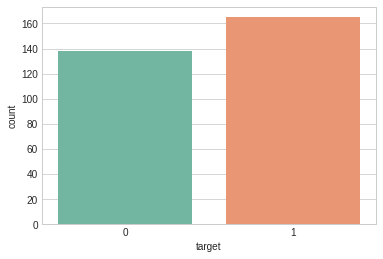

In [146]:
# Visualize the count of survivors
sns.countplot('target', data=hd_df)

We can determine that there are more patients that have been diagnosed with a heart disease in this dataset that ones that haven't.

## 3.2. Exploration of Age

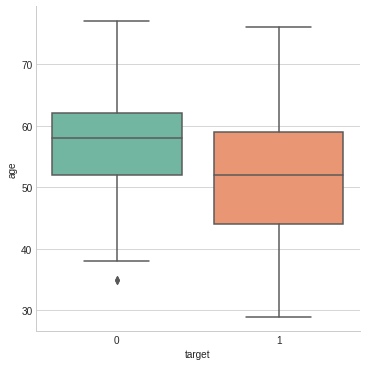

In [147]:
sns.catplot('target','age', data=hd_df, kind='box')

It seems that patients with absence and presence of heart disease have slightly different distribution, as it seems as patients with heart disease show a tendency to be of younger age.


## 3.3. Exploration of Sex

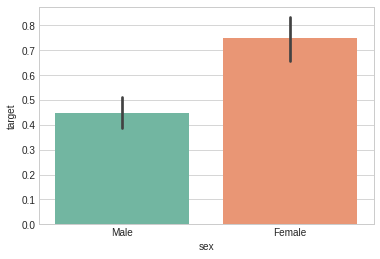

In [148]:
sns.barplot('sex', 'target', data=hd_df)
plt.show()

From this plot, we can extract that females have a higher rate of heart attack compared to male.

## 3.4. Exploration of Pain Type

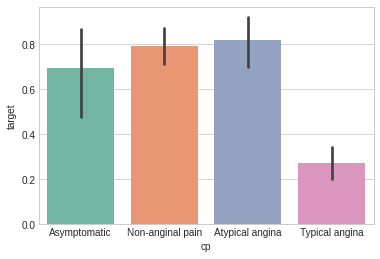

In [149]:
sns.barplot('cp', 'target', data=hd_df)
plt.show()

It seems like typican angina type is the least severe. There seems not to be a clear pattern of increase in risk of heart attack compared between typical and atypical angina and asymptomatic. 

## 3.5. Exploration of Resting Blood Pressure

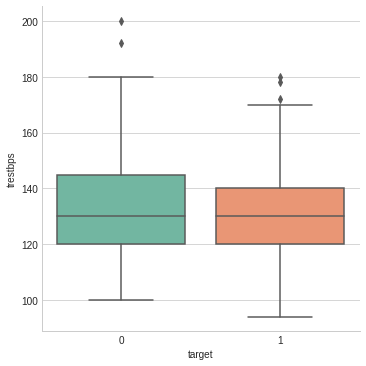

In [150]:
sns.catplot('target','trestbps',data=hd_df, kind='box')

There is little difference in resting blood pressure between 2 groups. This variable seems to be insignificant in predicting heart disease.

## 3.6. Exploration of Serum Cholesterol

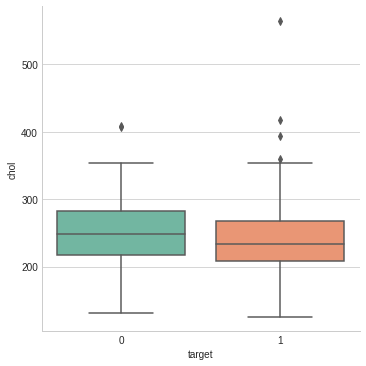

In [151]:
sns.catplot('target','chol',data=hd_df, kind='box')

Interesting, the average of patients without heart disease is higher than those with heart disease. This indicates that high level of serum cholestol is not particularly useful if we not take into the levels of different types of cholesterol.

## 3.7. Exploration of fasting blood sugar

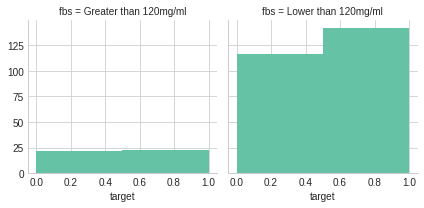

In [152]:
g = sns.FacetGrid(data=hd_df, col = 'fbs')
g.map(plt.hist,'target', bins=2)

There are no significant differences between healthy and heart disease patients in their fasting blood sugar level, either more or less than 120 mg / dl. But a slight increase in probability can be observed in patients with high fasting sugar levels.

## 3.8. Exploration of Resting Electriocardiogram

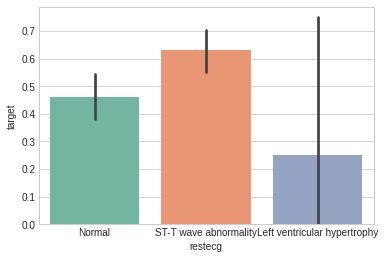

In [153]:
sns.barplot('restecg', 'target', data=hd_df)
plt.show()

The patients with restecg of ST_T wave abnormality seem to have the highest risk of getting heart disease. However, since there is a large variation in restecg, we cannot conclude that patients with restecg of Left Ventricular hypertrophy have less rish of heart disease.

## 3.9. Exploration of Maximum Heart Rate

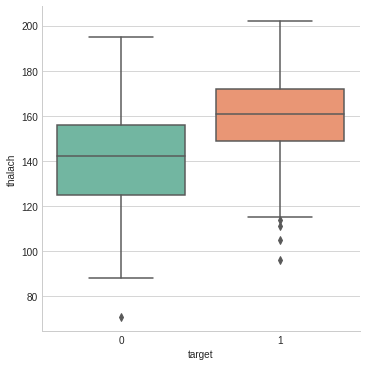

In [154]:
sns.catplot('target','thalach',data=hd_df, kind='box')

Patients with heart disease seem to have higher maximum heart rate achieved than those who don't. thalach can be a good indicator of the disease

## 3.10. Exploration of Exercice Induced Angina

<AxesSubplot:xlabel='exang', ylabel='target'>

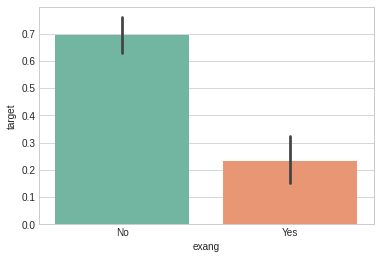

In [155]:
sns.barplot('exang','target',data=hd_df)

We can see the clear correlation between the exercise induced angina and the target; Patients without exercise induced angina have a high risk of getting the disease. 

## 3.11. Exploration of ST depression

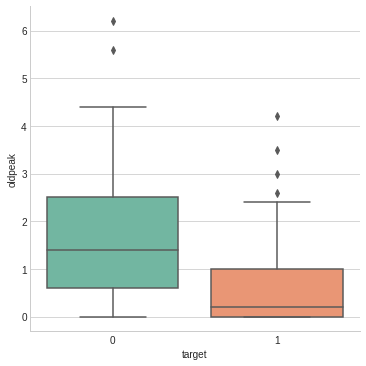

In [156]:
sns.catplot('target','oldpeak',data=hd_df, kind= 'box')

There seems to be a tendency that those with lower oldpeak has higher risk of getting heart disease. This seems to be another good indicator.

## 3.12. Exploration of Slope

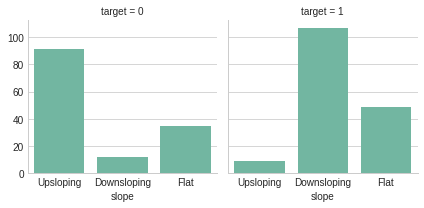

In [157]:
g = sns.FacetGrid(data=hd_df, col = 'target')
g.map(sns.countplot,'slope')
plt.show()

Non-disease patients tend to have slope close to Upsloping while the patients with heart disease have the slope close to Downsloping.

## 3.13. Exploration of Thal

<AxesSubplot:xlabel='thal', ylabel='count'>

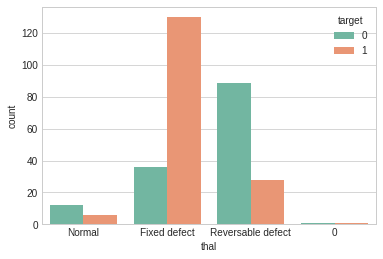

In [158]:
sns.countplot('thal',data=hd_df, hue='target')

We can determine that the majority of patients with detected heart disease show a reversible defect, and most healthy patients show abnormal results.


## 3.14. Exploration of number of major vessels

<AxesSubplot:xlabel='ca', ylabel='count'>

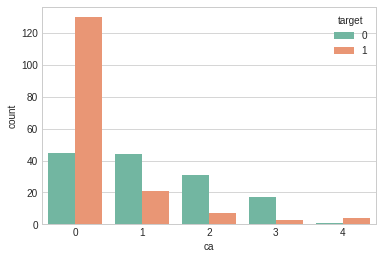

In [159]:
sns.countplot('ca',data=hd_df, hue='target')

Since there is less data available for ca >=1, we cannot understand well how these numbers contribute to the prediction. But looking at ca 0, the more than double number of patients who have heart disease compared to those who don't. This result can be retionalized that those who have less major vessels are more likely to have heart disease

<a id="t1."></a>
# 4. Logistic Regression and Results

## 4.1. Adjustments to Data

### Features Selection
**id**: identification variable
<br>**target:** response variable
<br>**age:** showed a tendency, we will include it.
<br>**sex:** it's relevant, we will include it.
<br>**cpchest:** showed a tendency, we will include it.
<br>**trestbps:** didn't show a tendency, we won't include it.
<br>**chol:** data doesn't seem relevant, we won't include it.
<br>**fbs:** didn't show a tendency, we won't include it.
<br>**restecg:** didn't show a tendency, we won't include it.
<br>**thalach:** showed a tendency, we will include it.
<br>**exang:** showed a tendency, we will include it.
<br>**oldpeak:** showed a tendency, we will include it.
<br>**slope:** showed a tendency, we will include it.
<br>**ca:** showed a tendency, we will include it.
<br>**thal:** showed a tendency, we will include it.


In [160]:
hd_final = hd_df.copy()
hd_final.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,Greater than 120mg/ml,Normal,150,No,2.3,Upsloping,0,Normal,1
1,37,Male,Non-anginal pain,130,250,Lower than 120mg/ml,ST-T wave abnormality,187,No,3.5,Upsloping,0,Fixed defect,1
2,41,Female,Atypical angina,130,204,Lower than 120mg/ml,Normal,172,No,1.4,Downsloping,0,Fixed defect,1
3,56,Male,Atypical angina,120,236,Lower than 120mg/ml,ST-T wave abnormality,178,No,0.8,Downsloping,0,Fixed defect,1
4,57,Female,Typical angina,120,354,Lower than 120mg/ml,ST-T wave abnormality,163,Yes,0.6,Downsloping,0,Fixed defect,1


In [161]:
hd_final.drop('trestbps', axis=1, inplace=True)
hd_final.drop('chol', axis=1, inplace=True)
hd_final.drop('restecg', axis=1, inplace=True)
hd_final.drop('fbs', axis=1, inplace=True)
hd_final.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,150,No,2.3,Upsloping,0,Normal,1
1,37,Male,Non-anginal pain,187,No,3.5,Upsloping,0,Fixed defect,1
2,41,Female,Atypical angina,172,No,1.4,Downsloping,0,Fixed defect,1
3,56,Male,Atypical angina,178,No,0.8,Downsloping,0,Fixed defect,1
4,57,Female,Typical angina,163,Yes,0.6,Downsloping,0,Fixed defect,1


### Creating Dummy Variables

In [162]:
hd_final = pd.get_dummies(hd_final, drop_first = True)

In [163]:
hd_final.head(4)

,age,thalach,oldpeak,ca,sex_Male,cp_Atypical angina,cp_Non-anginal pain,cp_Typical angina,exang_Yes,slope_Flat,slope_Upsloping,thal_Fixed defect,thal_Normal,thal_Reversable defect,target_1
0,63,150,2.3,0,1,0,0,0,0,0,1,0,1,0,1
1,37,187,3.5,0,1,0,1,0,0,0,1,1,0,0,1
2,41,172,1.4,0,0,1,0,0,0,0,0,1,0,0,1
3,56,178,0.8,0,1,1,0,0,0,0,0,1,0,0,1


### Create train and test dataset

In [164]:
x=hd_final.iloc[:,0:13]
y=hd_final['target_1']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10) 

In [165]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [166]:
x_train.head(3)

,age,thalach,oldpeak,ca,sex_Male,cp_Atypical angina,cp_Non-anginal pain,cp_Typical angina,exang_Yes,slope_Flat,slope_Upsloping,thal_Fixed defect,thal_Normal
286,59,162,0.8,2,1,0,0,0,0,0,0,1,0
102,63,179,0.0,2,0,1,0,0,0,0,0,1,0
242,64,132,2.0,2,1,0,0,1,0,1,0,0,1


In [167]:
y_train.head()

286    0
102    1
242    0
65     1
35     1
Name: target_1, dtype: uint8

## 4.2. Building the logistic model

In [168]:
logit_model = sm.Logit(y, x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               target_1   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Thu, 21 Jan 2021   Pseudo R-squ.:                     inf
Time:                        12:03:07   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0034      0.015     -0.222      0.825      -0.034       0.027
thalach

## 4.3. Predicting the test result and calculating the accuracy

In [169]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [170]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.78      0.81      0.79        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



**Precision:** is the ratio TP / (TP + FP) where TP is number of true positives and FP number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

<br>**Recall:** is the ratio TP / (TP + FN) where TP is the number of true positives and FN number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

<br>**F-score:** can be interpreted as a weighted harmonic mean of the precision and recall, where an F score reaches its best value at 1 and worst score at 0. The F score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall.

<br>**Support:** is the number of occurrences of each class in y_test.

### Confusion Matrix

In [171]:
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[29  6]
 [ 5 21]]



The output tells that there are 29 + 21 correct predictions and 5 + 6 incorrect predictions.